In [177]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [178]:
#loading the Dataset
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv'
abalone_dataset=pd.read_csv(url)

In [179]:
# checking number of rows and colmuns 
abalone_dataset.shape

(4177, 9)

In [180]:
abalone_dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [181]:
abalone_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<AxesSubplot:title={'center':'Total number of abalone represented by sex'}, xlabel='Sex'>

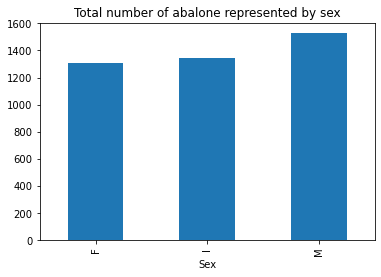

In [182]:
abalone_dataset.groupby('Sex').size().plot.bar(title='Total number of abalone represented by sex')

In [183]:
# converting  categorial data (sex) into numerical data and coverting it into float type such as the other independent variable
le=LabelEncoder()
abalone_dataset['Sex']=le.fit_transform(abalone_dataset['Sex'])
abalone_dataset['Sex']=abalone_dataset['Sex'].astype('float')

In [184]:
abalone_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [185]:
#checking for null values
abalone_dataset.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [186]:
#analizing the data
abalone_dataset.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


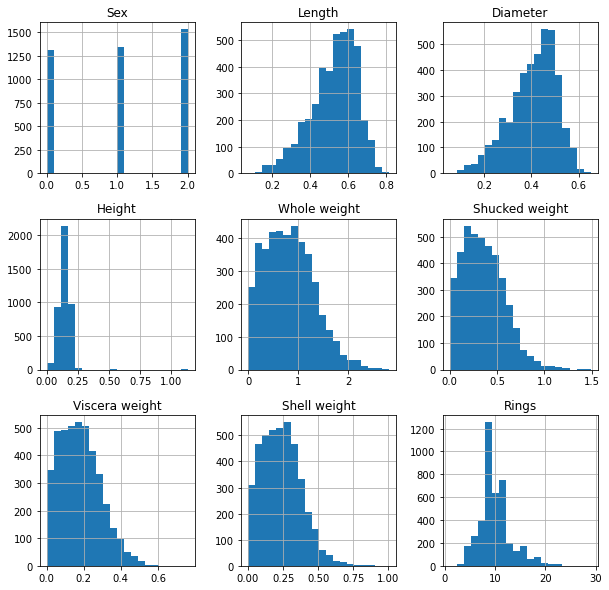

In [187]:
abalone_dataset.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

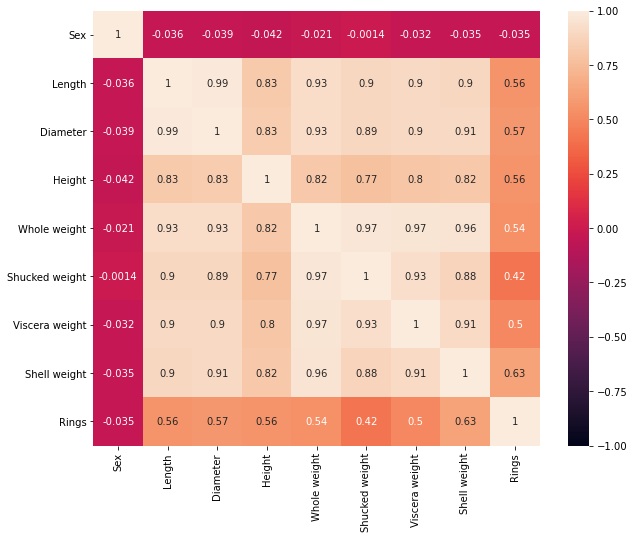

In [188]:
#visualizing the data for corelation between dependent and independent variables
plt.figure(figsize=(10,8))
sns.heatmap(abalone_dataset.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

From the above visualization we can say that all the independent variable are co-related to Rings (positively)

In [189]:
#sex has co relation so dropping the data
abalone_dataset_new = abalone_dataset.drop(columns=['Sex'])

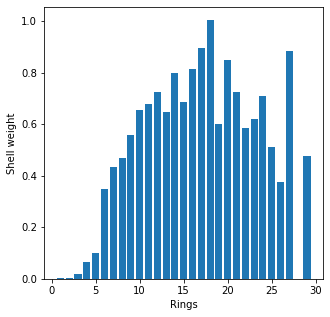

In [190]:
plt.figure(figsize=[5,5])
plt.bar(abalone_dataset_new['Rings'],abalone_dataset_new['Shell weight'])
plt.xlabel('Rings')
plt.ylabel('Shell weight')
plt.show()

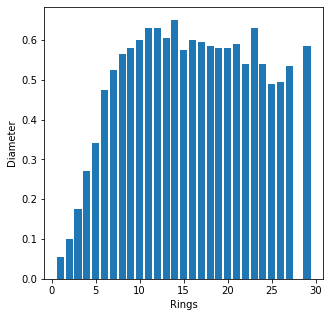

In [191]:
plt.figure(figsize=[5,5])
plt.bar(abalone_dataset_new['Rings'],abalone_dataset['Diameter'])
plt.xlabel('Rings')
plt.ylabel('Diameter')
plt.show()

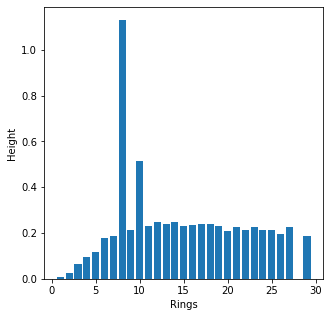

In [192]:
plt.figure(figsize=[5,5])
plt.bar(abalone_dataset_new['Rings'],abalone_dataset_new['Height'])
plt.xlabel('Rings')
plt.ylabel('Height')
plt.show()

<Figure size 720x360 with 0 Axes>

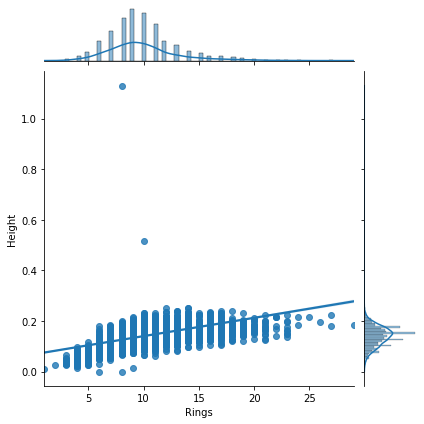

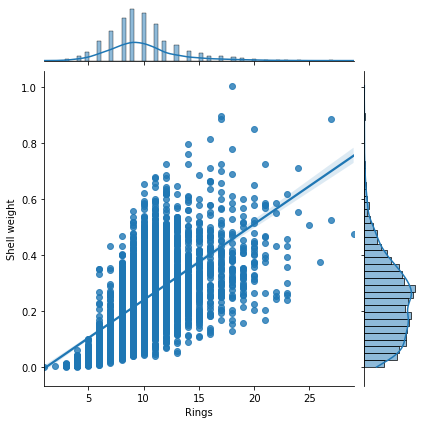

In [193]:
plt.figure(figsize=(10, 5))
sns.jointplot(data=abalone_dataset, x='Rings', y='Height', kind='reg');
sns.jointplot(data=abalone_dataset, x='Rings', y='Shell weight', kind='reg');

In [194]:
# dropping the dependent variable from the dataset storing it in a new list

X= abalone_dataset_new.drop('Rings',axis=1)

In [195]:
Y= abalone_dataset_new['Rings']

In [196]:
# Train & Test Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [197]:
print(Y.shape, Y_train.shape, Y_test.shape)

(4177,) (2923,) (1254,)


In [198]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)

In [199]:
model1 = RandomForestRegressor(max_depth=2, random_state=0)
model2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [200]:
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [201]:
X_test_predict_rfr= model1.predict(X_test)


X_test_predict_gb= model2.predict(X_test)


In [202]:
print("RANDOM FOREST REGRESSOR \n\n")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, X_test_predict_rfr))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, X_test_predict_rfr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, X_test_predict_rfr)))
print('R2: ',r2_score(Y_test, X_test_predict_rfr))

RANDOM FOREST REGRESSOR 


Mean Absolute Error: 1.794448774984809
Mean Squared Error: 6.244597175323032
Root Mean Squared Error: 2.498919201439501
R2:  0.4077026254727789


In [203]:
print("Gradient Boosting Classifier \n\n")
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, X_test_predict_gb))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, X_test_predict_gb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, X_test_predict_gb)))
print('R2: ',r2_score(Y_test, X_test_predict_gb))


Gradient Boosting Classifier 


Mean Absolute Error: 4.3381180223285485
Mean Squared Error: 25.1658692185008
Root Mean Squared Error: 5.016559500145573
R2:  -1.386971945078645


RANDOM FOREST REGRESSOR 




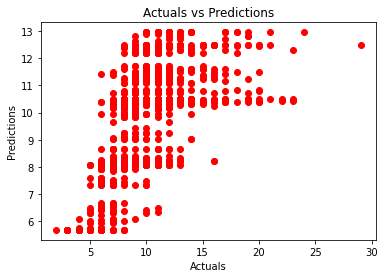

In [219]:
print("RANDOM FOREST REGRESSOR \n\n")
plt.scatter(Y_test,X_test_predict_rfr,color='red')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Actuals vs Predictions')
plt.show()

GRADIENT BOOSTING 




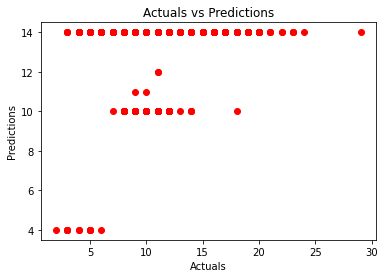

In [220]:
print("GRADIENT BOOSTING \n\n")
plt.scatter(Y_test,X_test_predict_gb,color='red')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Actuals vs Predictions')
plt.show()

RANDOM FOREST REGRESSOR HAS THE LEAST ERROR COMPARATIVELY

In [204]:
#Defining the function for predicting data using Random Forest 
def result(df, target, task):
    df=df.copy()
    
    Y=df[target].copy()
    X=df.drop(target, axis=1).copy()
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)
    
    #defining model
    if task== 'rfr':
        modelX= RandomForestRegressor()
    elif task =='gb':
        modelX= GradientBoostingClassifier()
        
    modelX.fit(X_train,Y_train)
    # fetching results
    return modelX.score(X_test, Y_test)

*PREDICTIONS

In [205]:
#LENGTH PREDICTION
length_pred= result(abalone_dataset_new, target='Length', task='rfr')
print("Length Accuracy: {:.2f}%".format(length_pred*100))

Length Accuracy: 97.76%


In [209]:
Diameter_pred= result(abalone_dataset_new, target='Diameter',task='rfr')
print("Diameter Accuracy: {:.2f}%".format(Diameter_pred*100))

Diameter Accuracy: 97.61%


In [210]:
height_pred= result(abalone_dataset_new, target='Height', task='rfr')
print("Height Accuracy: {:.2f}%".format(height_pred*100))

Height Accuracy: 74.37%


In [211]:
Wwgt_pred= result(abalone_dataset_new, target='Whole weight', task='rfr')
print("Whole weight Accuracy: {:.2f}%".format(Wwgt_pred*100))

Whole weight Accuracy: 98.85%


In [212]:
height_pred= result(abalone_dataset_new, target='Shucked weight', task='rfr')
print("Shucked weight Accuracy: {:.2f}%".format(height_pred*100))

Shucked weight Accuracy: 96.79%


In [213]:
Vwgt_pred= result(abalone_dataset_new, target='Viscera weight', task='rfr')
print("Viscera weight Accuracy: {:.2f}%".format(Vwgt_pred*100))

Viscera weight Accuracy: 94.54%


In [215]:
Shell_pred= result(abalone_dataset_new, target='Shell weight', task='rfr')
print("Shell weight Accuracy: {:.2f}%".format(Shell_pred*100))

Shell weight Accuracy: 95.17%


In [216]:
R_pred= result(abalone_dataset_new, target='Rings', task='rfr')
print("Rings Accuracy: {:.2f}%".format(R_pred*100))

Rings Accuracy: 53.08%
